In [3]:
import torchvision
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from matplotlib.lines import Line2D
from torchvision import transforms
mnist = torchvision.datasets.MNIST(root='.', download=True)

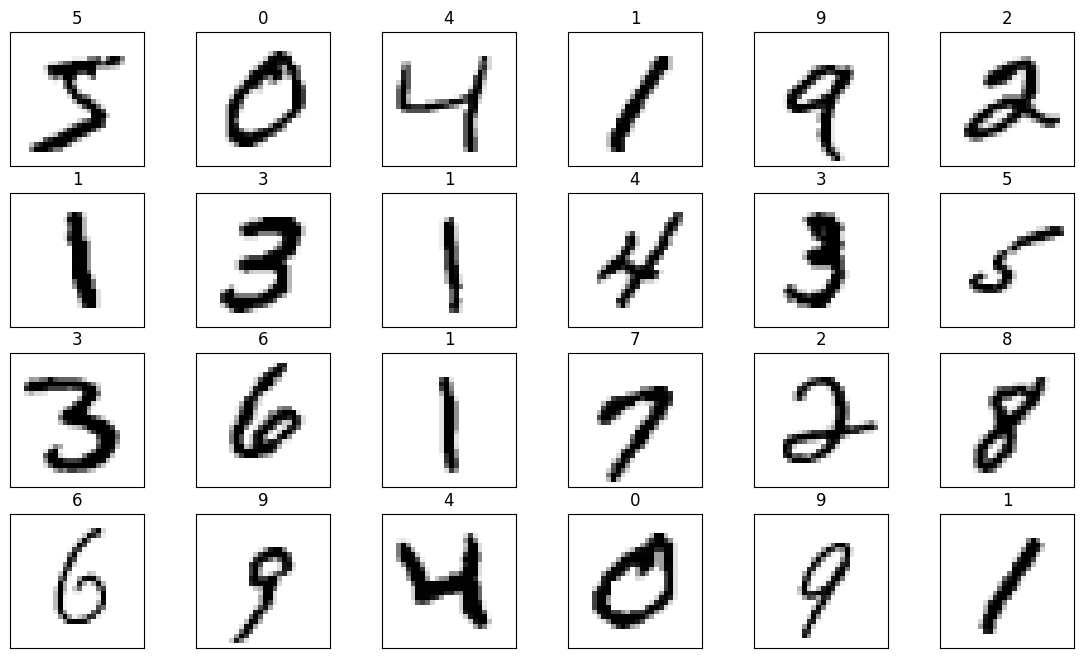

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
for i in range(24):
    plt.subplot(4, 6, i+1)
    plt.imshow(mnist.data[i], vmin=0, vmax=255, cmap='gray_r')
    plt.xticks([])
    plt.yticks([])
    plt.title(int(mnist.targets[i]))

In [7]:
accuracy_train = []
accuracy_test = []

def continue_training():
    network.train()      # configure the network for training
    for i in range(5):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 1000
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)
                   # feed in the data 
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule
            
            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)
    
    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)


In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 12, kernel_size=5)  # set the size of the convolution to 5x5, and have 12 of them
        self.conv2 = nn.Conv2d(12, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))  # make sure to do max pooling after the convolution layers
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)


tensor([[ 0.5000, -1.5000, -1.5000, -1.5000, -1.5000, -1.5000, -1.5000, -1.5000,
         -1.5000, -1.5000],
        [-1.5000,  0.5000, -1.5000, -1.5000, -1.5000, -1.5000, -1.5000, -1.5000,
         -1.5000, -1.5000],
        [-1.5000, -1.5000,  0.5000, -1.5000, -1.5000, -1.5000, -1.5000, -1.5000,
         -1.5000, -1.5000],
        [-1.5000, -1.5000, -1.5000,  0.5000, -1.5000, -1.5000, -1.5000, -1.5000,
         -1.5000, -1.5000],
        [-1.5000, -1.5000, -1.5000, -1.5000,  0.5000, -1.5000, -1.5000, -1.5000,
         -1.5000, -1.5000],
        [-1.5000, -1.5000, -1.5000, -1.5000, -1.5000,  0.5000, -1.5000, -1.5000,
         -1.5000, -1.5000],
        [-1.5000, -1.5000, -1.5000, -1.5000, -1.5000, -1.5000,  0.5000, -1.5000,
         -1.5000, -1.5000],
        [-1.5000, -1.5000, -1.5000, -1.5000, -1.5000, -1.5000, -1.5000,  0.5000,
         -1.5000, -1.5000],
        [-1.5000, -1.5000, -1.5000, -1.5000, -1.5000, -1.5000, -1.5000, -1.5000,
          0.5000, -1.5000],
        [-1.5000, -

C:\Users\Param\AppData\Local\Temp\ipykernel_18040\3087577786.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Iteration 1 Training accuracy: 0.5468000173568726
Iteration 1 Testing accuracy: 0.6200000047683716
Iteration 2 Training accuracy: 0.5641999840736389
Iteration 2 Testing accuracy: 0.5174000263214111
Iteration 3 Training accuracy: 0.8844000101089478
Iteration 3 Testing accuracy: 0.8862000107765198
Iteration 4 Training accuracy: 0.9305999875068665
Iteration 4 Testing accuracy: 0.920199990272522
Iteration 5 Training accuracy: 0.9506000280380249
Iteration 5 Testing accuracy: 0.9319999814033508
[[0.5, -1.5, 0.9319999814033508]]
tensor([[ 0.5000, -1.4000, -1.4000, -1.4000, -1.4000, -1.4000, -1.4000, -1.4000,
         -1.4000, -1.4000],
        [-1.4000,  0.5000, -1.4000, -1.4000, -1.4000, -1.4000, -1.4000, -1.4000,
         -1.4000, -1.4000],
        [-1.4000, -1.4000,  0.5000, -1.4000, -1.4000, -1.4000, -1.4000, -1.4000,
         -1.4000, -1.4000],
        [-1.4000, -1.4000, -1.4000,  0.5000, -1.4000, -1.4000, -1.4000, -1.4000,
         -1.4000, -1.4000],
        [-1.4000, -1.4000, -1.4000, 

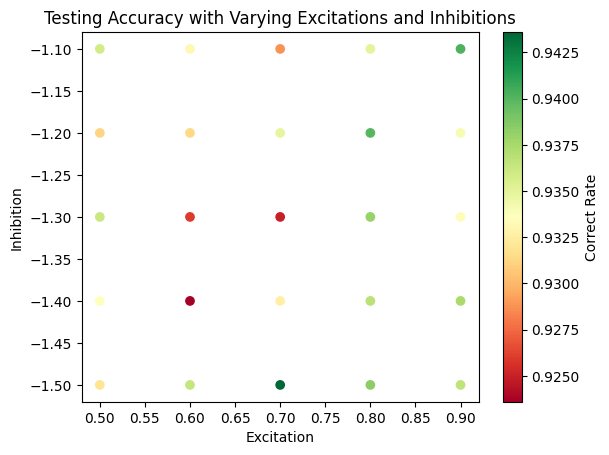

The highest accuracy was seen with 0.7 Excitation and -1.5 Inhibition with an accuracy of 0.9435999989509583%


In [15]:
mnist = torchvision.datasets.MNIST(root='.', download=True, transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000)), 
                                        batch_size=1000, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.Subset(mnist, np.arange(5000, 10000)), 
                                        batch_size=1000, shuffle=True)

excitations = np.arange(0.5, 1, 0.1)
inhibitions = np.arange(-1.5, -1, 0.1)
graph_vals = []
for e in excitations:
    for i in inhibitions:
        w = np.zeros((10, 10), dtype=np.float32)
        w[:] = i  
        for k in range(10):
            w[k,k] = e   
        w = torch.tensor(w)
        print(w)
        network = Net()
        optimizer = optim.SGD(network.parameters(), lr=0.1, momentum=0.5)
        accuracy_train = []
        accuracy_test = []
        for j in range(5):
            continue_training()

        graph_vals.append([e, i, accuracy_test[-1]])
        print(graph_vals)



x = [point[0] for point in graph_vals]
y = [point[1] for point in graph_vals]
z = [point[2] for point in graph_vals]

plt.scatter(x, y, c=z, cmap='RdYlGn') 
plt.colorbar(label='Correct Rate')
plt.xlabel('Excitation')
plt.ylabel('Inhibition')
plt.title('Testing Accuracy with Varying Excitations and Inhibitions')
plt.show()

highest = z.index(max(z))
print("The highest accuracy was seen with " + str(x[highest]) + " Excitation and " + str(y[highest]) + " Inhibition with an accuracy of " + str(max(z)) + "%")